In [2]:
# Packages
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load metadata
df_info = pd.read_csv('/content/drive/MyDrive/Street Sounds Classification/archive/UrbanSound8K.csv')

In [4]:
# Check data classes
df_info['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [5]:
df_info[df_info['fold'] == 1]['class'].value_counts()

jackhammer          120
dog_bark            100
children_playing    100
street_music        100
air_conditioner     100
drilling            100
engine_idling        96
siren                86
car_horn             36
gun_shot             35
Name: class, dtype: int64

In [ ]:
# Load sample record

In [9]:
filename = r"/content/drive/MyDrive/Street Sounds Classification/archive/fold1/101415-3-0-2.wav"

In [10]:
# Load a record
y, sr = librosa.load(filename, sr=44100, mono=True)

In [11]:
y

array([-0.00014107, -0.00016235, -0.00017633, ..., -0.04736631,
       -0.04857834, -0.04710125], dtype=float32)

In [12]:
# Check duration - is it proper?
len(y)/sr
# https://www.quora.com/Is-1411-2-kb-s-in-audio-bitrate-the-same-as-16-bit
# ch_num * resultion * sr = transmission_speed - do sprawdzenia (strona wyżej)

4.0

In [13]:
# Display waveplot

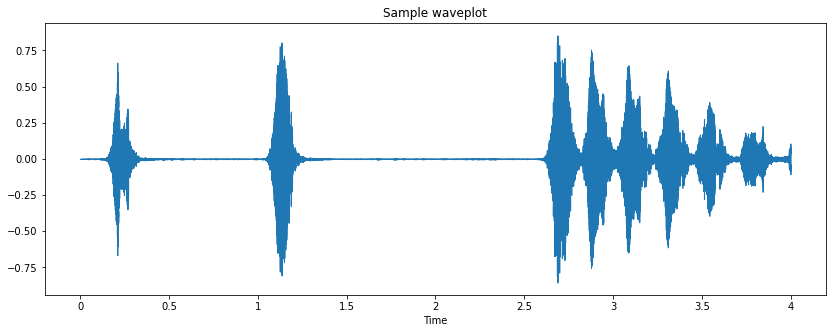

In [14]:
plt.figure(figsize=(14,5))
plt.title('Sample waveplot')
librosa.display.waveshow(y, sr=sr)

In [15]:
df_info[df_info['slice_file_name'] == '101415-3-0-2.wav']

,slice_file_name,fsID,start,end,salience,fold,classID,class
64,101415-3-0-2.wav,101415,1.0,5.0,1,1,3,dog_bark


In [16]:
# Load sound with offset and duration time

In [17]:
y, sr = librosa.load(filename, sr=44100, offset=2.5, duration=1)

In [18]:
len(y)

44100

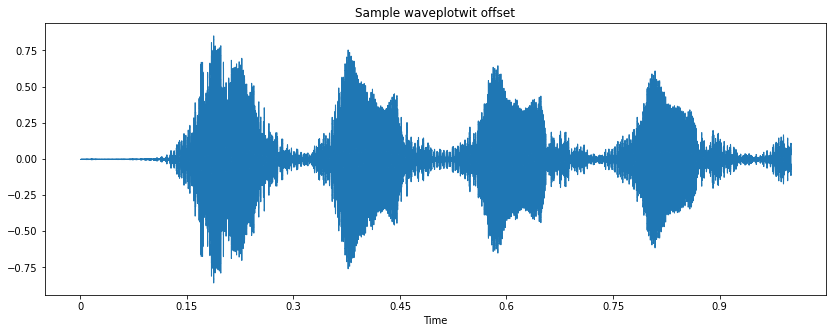

In [19]:
plt.figure(figsize=(14,5))
plt.title('Sample waveplotwit offset')
librosa.display.waveshow(y, sr=sr)

In [ ]:
# Feature extraction

In [20]:
# 1. Zero crossing rate - 0.01 to prevent oscilations
zcr = librosa.feature.zero_crossing_rate(y+0.01)

In [21]:
zcr.shape

(1, 87)

In [22]:
zcr.sum()/zcr.shape[1]

0.02016545438218391

In [23]:
# 2. Change sign number
changeSignArray = librosa.zero_crossings(y)

In [24]:
changeSignArray

array([ True, False, False, ..., False, False, False])

In [25]:
changeSignArray.shape

(44100,)

In [26]:
changeSign = sum(changeSignArray)

In [27]:
changeSign

1038

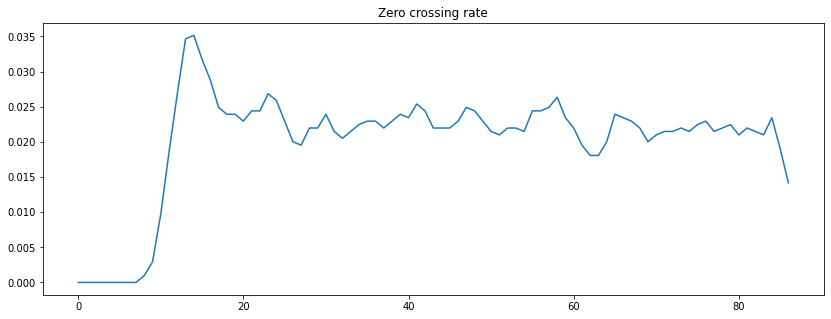

In [28]:
# Plot of zero crossing rate
plt.figure(figsize=(14,5))
plt.title('Zero crossing rate')
plt.plot(zcr[0])

In [29]:
sum(zcr[0])/zcr.shape[1]

0.02016545438218391

In [30]:
# 3. Energy

In [31]:
hop_length = 1
frame_length = 1

In [32]:
energy = np.array([sum(abs(y[i:(i+frame_length)]**2)) for i in range(0, len(y), hop_length)])

In [33]:
energy

array([1.78914121e-07, 1.49226764e-07, 1.82095306e-07, ...,
       9.87150427e-03, 7.94791896e-03, 5.40958857e-03])

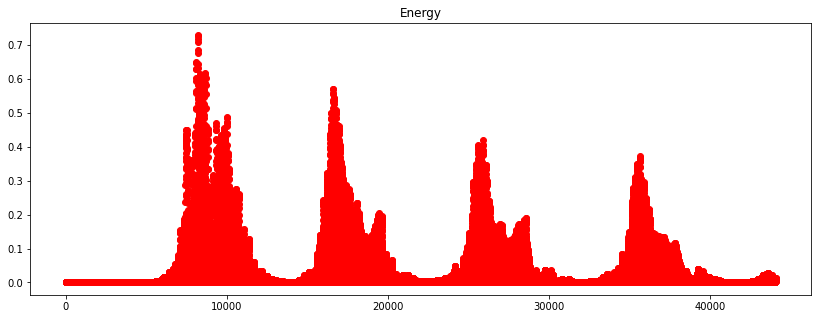

In [34]:
plt.figure(figsize=(14,5))
plt.title('Energy')
plt.plot(energy, 'ro')

In [35]:
# Sum of energy
energyValue = sum(energy)/energy.shape[0]

In [36]:
energyValue

0.034709567583128896

In [37]:
# 4. Root-mean-square energy (RMSE)
import math

In [38]:
rmseValue = math.sqrt(np.mean(y*y))

In [39]:
rmseValue

0.18630503305459203

In [40]:
# FFT
from scipy.fft import fft, ifft

In [41]:
FFT = fft(y)
FFT_mag = abs(FFT)
f = np.linspace(0, sr, len(y))

Text(0.5, 0, 'Frequency [Hz]')

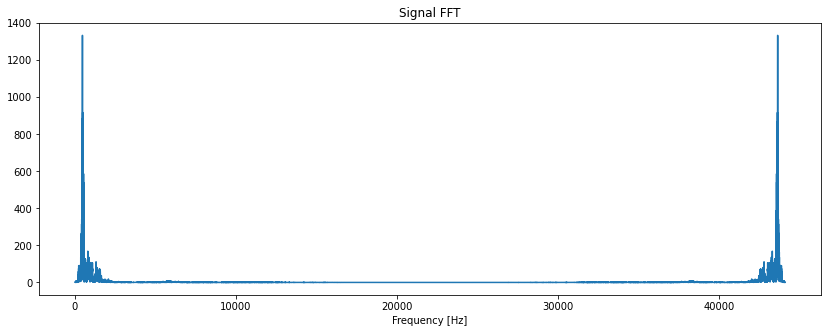

In [42]:
plt.figure(figsize=(14,5))
plt.title('Signal FFT')
plt.plot(f, FFT_mag)
plt.xlabel('Frequency [Hz]')

Text(0.5, 0, 'Frequency [Hz]')

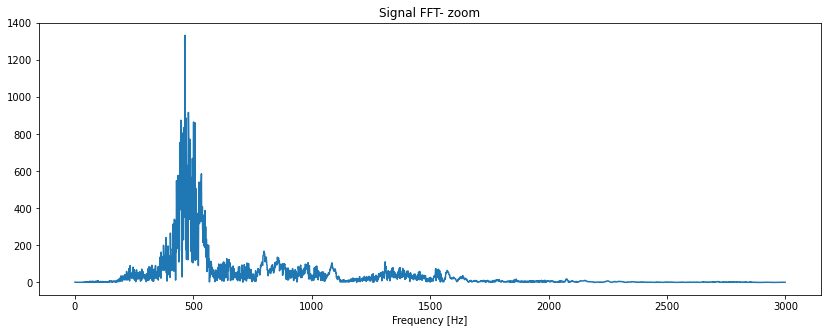

In [43]:
plt.figure(figsize=(14,5))
plt.title('Signal FFT- zoom')
plt.plot(f[:3000], FFT_mag[:3000])
plt.xlabel('Frequency [Hz]')

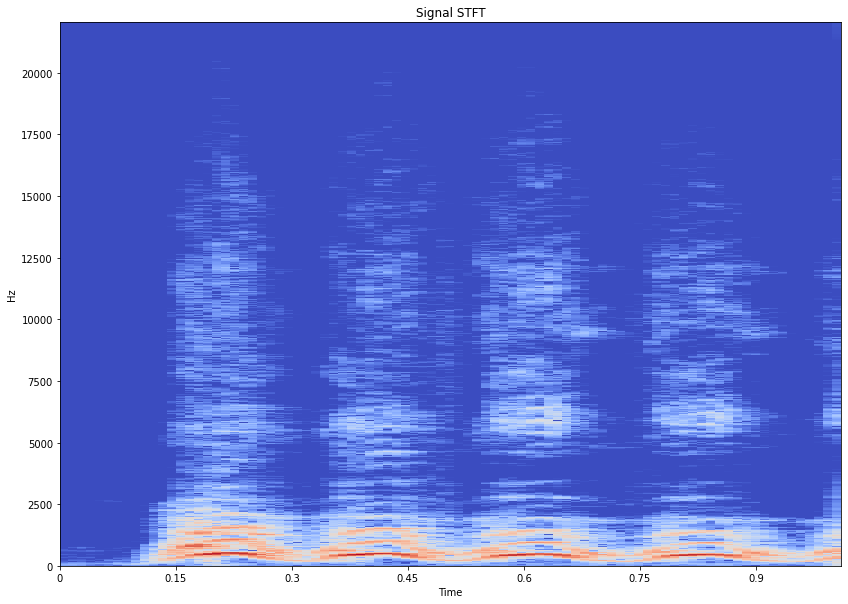

In [44]:
# STFT
X = librosa.stft(y)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14,10))
plt.title('Signal STFT')
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

In [45]:
# 5. Spectral centroid 
cent = librosa.feature.spectral_centroid(y, sr, n_fft=2048)

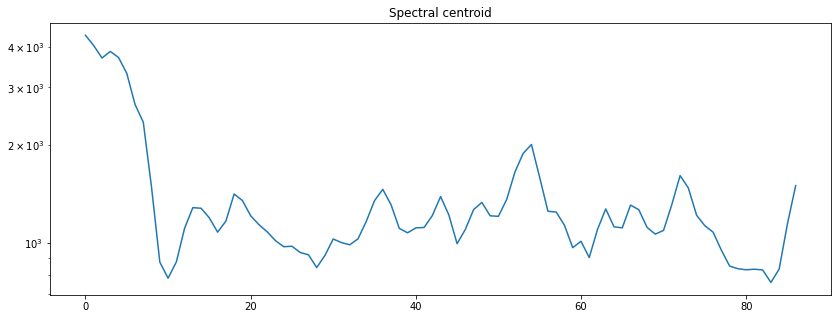

In [46]:
plt.figure(figsize=(14,5))
plt.title('Spectral centroid')
plt.semilogy(cent.T)

In [47]:
cent.shape

(1, 87)

In [48]:
cent

array([[4330.03320828, 4026.76229607, 3690.43887239, 3865.20545995,
        3704.32832765, 3313.129851  , 2660.21965295, 2346.67793774,
        1481.12713155,  875.92382016,  781.99111092,  876.65683653,
        1111.57689922, 1285.59522149, 1280.06051165, 1196.00238728,
        1081.6584736 , 1168.91561475, 1415.59518385, 1351.79259591,
        1214.33006612, 1140.5764218 , 1084.30562224, 1018.91834021,
         976.06260205,  979.37444965,  937.10938474,  922.05530563,
         842.65911148,  918.50149411, 1030.6666209 , 1004.88452295,
         989.38723433, 1031.8068098 , 1166.89586289, 1350.41198138,
        1462.45604957, 1312.55541167, 1110.55041675, 1076.78668761,
        1114.5550897 , 1117.95408622, 1215.61144118, 1389.66274846,
        1221.34818055,  997.10536835, 1102.77907168, 1268.34872315,
        1333.75319711, 1213.75192132, 1209.31044903, 1360.54663447,
        1651.56243088, 1885.00921869, 2005.98290646, 1590.57928626,
        1253.30459201, 1246.51020835, 1135.32336

In [49]:
centAvg = cent.sum()/cent.shape[1]

In [50]:
centAvg

1371.164752995735

In [51]:
# 6. Spectral roll off

In [52]:
rolloff = librosa.feature.spectral_rolloff(y, sr)

In [53]:
rolloff.shape

(1, 87)

In [54]:
rolloff

array([[10486.66992188,  9948.33984375,  9603.80859375,  9969.87304688,
         9603.80859375,  8354.8828125 ,  6459.9609375 ,  5383.30078125,
         1550.390625  ,   839.79492188,   882.86132812,  1012.06054688,
         1421.19140625,  1507.32421875,  1421.19140625,  1399.65820312,
         1399.65820312,  1507.32421875,  1593.45703125,  1593.45703125,
         1550.390625  ,  1507.32421875,  1421.19140625,  1313.52539062,
         1291.9921875 ,  1291.9921875 ,  1227.39257812,  1205.859375  ,
          904.39453125,   947.4609375 ,  1248.92578125,  1291.9921875 ,
         1313.52539062,  1378.125     ,  1442.72460938,  1528.85742188,
         1550.390625  ,  1528.85742188,  1378.125     ,  1248.92578125,
         1248.92578125,  1248.92578125,  1227.39257812,  1442.72460938,
         1184.32617188,   904.39453125,  1098.19335938,  1270.45898438,
         1335.05859375,  1313.52539062,  1313.52539062,  1399.65820312,
         1507.32421875,  4694.23828125,  5770.8984375 ,  1593.45

In [55]:
rolloffAvg = rolloff.sum()/rolloff.shape[1]

In [56]:
rolloffAvg

1988.727438038793

In [57]:
# 7. Spectral roll off low 

In [58]:
rolloffLow = librosa.feature.spectral_rolloff(y, sr, roll_percent=0.1)

In [59]:
rolloffLowAvg = rolloffLow.sum()/rolloffLow.shape[1]

In [60]:
rolloffLowAvg

313.59273976293105

In [61]:
# 8. Spectral flux

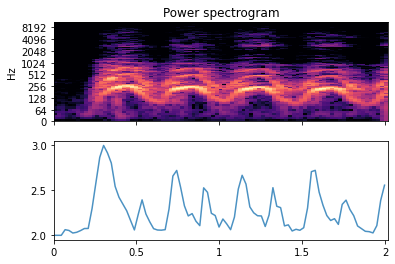

In [62]:
D = np.abs(librosa.stft(y))

times = librosa.times_like(D)

fig, ax = plt.subplots(nrows=2, sharex=True)

librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),y_axis='log', x_axis='time', ax=ax[0])

ax[0].set(title='Power spectrogram')

ax[0].label_outer()

onset_env = librosa.onset.onset_strength(y=y, sr=sr)

ax[1].plot(times, 2 + onset_env / onset_env.max(), alpha=0.8, label='Mean (mel)')

In [63]:
spectralFlux = np.mean(onset_env)

In [64]:
# 9. MFCC

In [65]:
mfccs = librosa.feature.mfcc(y, sr, n_mfcc=30)

Text(0.5, 1.0, 'MFCCs')

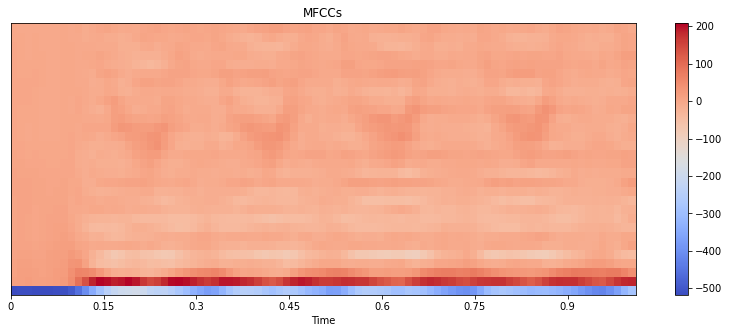

In [66]:
plt.figure(figsize=(14,5))
librosa.display.specshow(mfccs, x_axis = 'time', sr=sr)
plt.colorbar()
plt.title('MFCCs')

In [67]:
import os

In [68]:
os.chdir(r"/content/drive/MyDrive/Street Sounds Classification/archive")

In [69]:
def spectral_flux(y, sr):
    D = np.abs(librosa.stft(y))
    times = librosa.times_like(D)
    onset_env = librosa.onset.onset_strength(y=y, sr=sr)
    spectralFlux = np.mean(onset_env)
    
    return spectralFlux

In [ ]:
dict_list = []

# Iterate throug folds (1-10)
for fold in range(1, 11):
    # Iterate through each file in fold 1-10
    for filename in os.listdir('fold'+str(fold)):
        # Load sound
        y, sr = librosa.load(('fold'+str(fold)+'/'+filename), sr = 44100, mono = True)
        
        # Data drictionary
        data_dict = {}
        
        # 1. Zero crossing rate - 0.01 to prevent oscilations
        zcr = librosa.feature.zero_crossing_rate(y+0.01) 
        zcrAvg = zcr.sum()/zcr.shape[1]
        data_dict['zcrAvg'] = zcrAvg
        
        # 2. Change sign number
        changeSignArray = librosa.zero_crossings(y)
        changeSign = sum(changeSignArray)
        data_dict['changeSign'] = changeSign
        
        # 3. Energy
        hop_length = 1
        frame_length = 1
        energy = np.array([sum(abs(y[i:(i+frame_length)]**2)) for i in range(0, len(y), hop_length)])
        energyValue = sum(energy)/energy.shape[0]
        data_dict['energyValue'] = energyValue
        
        # 4. RMSE (root mean squared energy)
        rmseValue = math.sqrt(np.mean(y*y))
        data_dict['rmseValue'] = rmseValue
        
        # 5. Centroid 
        cent = librosa.feature.spectral_centroid(y, sr, n_fft=2048)
        centAvg = cent.sum()/cent.shape[1]
        data_dict['centAvg'] = centAvg
        
        # 6. Rolloff 85%
        rolloff = librosa.feature.spectral_rolloff(y, sr)
        rolloffAvg = rolloff.sum()/rolloff.shape[1]
        data_dict['rollOff85_Avg'] = rolloffAvg
        
        # 7. Rolloff low - 10%
        rolloffLow = librosa.feature.spectral_rolloff(y, sr, roll_percent=0.1)
        rolloffAvg_10 = rolloffLow.sum()/rolloffLow.shape[1]
        data_dict['rollOff10_Avg'] = rolloffAvg_10
        
        # 8. Spectral flux
        spectralFlux = spectral_flux(y, sr)
        data_dict['spectralFlux'] = spectralFlux
        
        # 9. MFCCs coeffs
        mfccs = librosa.feature.mfcc(y, sr, n_mfcc=30)
        mfccsAvg = {'mfcc'+str(idx+1): np.mean(mfcc) for idx, mfcc in enumerate(mfccs)}
        data_dict = {**data_dict, **mfccsAvg}
        
        # Class
        data_dict['class'] = df_info[df_info['slice_file_name'] == filename]['class'].values[0]
        
        # Add data doctopmary to list
        dict_list.append(data_dict)
        print('Fold %d, %s' % (fold, filename))

Fold 1, 101415-3-0-3.wav
Fold 1, 101415-3-0-2.wav
Fold 1, 101415-3-0-8.wav
Fold 1, 102305-6-0-0.wav
Fold 1, 102106-3-0-0.wav
Fold 1, 102842-3-1-0.wav
Fold 1, 102842-3-0-1.wav
Fold 1, 102842-3-1-6.wav
Fold 1, 102842-3-1-5.wav
Fold 1, 103074-7-0-0.wav
Fold 1, 103074-7-0-1.wav
Fold 1, 103074-7-0-2.wav
Fold 1, 103074-7-1-1.wav
Fold 1, 103074-7-1-0.wav
Fold 1, 103074-7-1-2.wav
Fold 1, 103074-7-1-3.wav
Fold 1, 103074-7-1-5.wav
Fold 1, 103074-7-1-4.wav
Fold 1, 103074-7-1-6.wav
Fold 1, 103074-7-3-0.wav
Fold 1, 103074-7-2-0.wav
Fold 1, 103074-7-3-1.wav
Fold 1, 103074-7-3-2.wav
Fold 1, 103074-7-3-3.wav
Fold 1, 103074-7-4-0.wav
Fold 1, 103074-7-4-2.wav
Fold 1, 103074-7-4-3.wav
Fold 1, 103074-7-4-1.wav
Fold 1, 103258-5-0-17.wav
Fold 1, 103258-5-0-16.wav
Fold 1, 103258-5-0-0.wav
Fold 1, 103258-5-0-15.wav
Fold 1, 103258-5-0-10.wav
Fold 1, 103258-5-0-1.wav
Fold 1, 103074-7-4-5.wav
Fold 1, 103074-7-4-4.wav
Fold 1, 103258-5-0-13.wav
Fold 1, 103258-5-0-12.wav
Fold 1, 103258-5-0-14.wav
Fold 1, 103258-5-0

In [ ]:
df = pd.DataFrame(dict_list)

In [ ]:
df.to_csv('/content/drive/MyDrive/Street Sounds Classification/sounds_featuresCSV.csv', sep =';')

NameError: name 'df' is not defined